In [1]:
import torch
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image
from torch.utils.data import DataLoader
from torchvision.datasets import CelebA
from utils.image import *
from utils.io import *
from models import Conv2dCNP
import matplotlib.pyplot as plt

In [2]:
checkpoint_path = "convcnp.tar"

device = torch.device("cpu")
model = Conv2dCNP(3, 128, 8)
epoch, model, _ = load(checkpoint_path, model)

loaded checkpoint at epoch 8 from convcnp.tar


In [3]:
testset = CelebA("data", "test", download=True, transform=transforms.Compose([transforms.Resize((64,64)), transforms.ToTensor()]))
testloader = DataLoader(testset, 8, True)

Files already downloaded and verified


In [4]:
model.eval()
original = next(iter(testloader))[0]

erased_rect, mask_rect = mask_rectangle(original, (0.1, 0.1), (1 / 3, 3))
erased_rand, mask_rand = mask_random(original, 0.8)

inpainted_rect = model(erased_rect, mask_rect)
inpainted_rand = model(erased_rand, mask_rand)

mse_rand = ((original - inpainted_rand.mean) ** 2).mean()

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torchvision/transforms/transforms.py:1643: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  v = torch.tensor(value)[:, None, None]


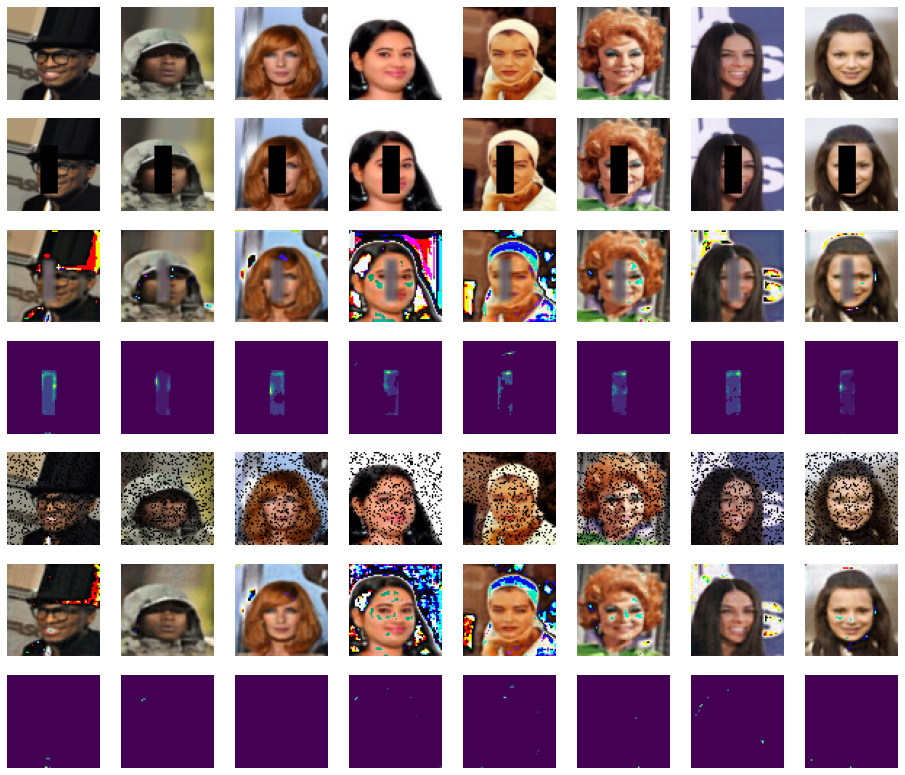

In [5]:
fig, ax = plt.subplots(7, 8, figsize=(16, 14))
for i in range(8):
    ax[0, i].imshow(to_pil_image(original[i]))
    ax[1, i].imshow(to_pil_image(erased_rect[i]))
    ax[2, i].imshow(to_pil_image(inpainted_rect.mean[i]))
    ax[3, i].imshow(to_pil_image(inpainted_rect.stddev[i].mean(0)))
    ax[4, i].imshow(to_pil_image(erased_rand[i]))   
    ax[5, i].imshow(to_pil_image(inpainted_rand.mean[i]))
    ax[6, i].imshow(to_pil_image(inpainted_rand.stddev[i].mean(0)))

[p.set_axis_off() for p in ax.ravel()]
plt.show()